In [2]:
# Import Modul
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import sqlite3 as sql3
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
   

In [3]:
#Metode Cleansing
conn = sql3.connect("abusive_text.db", check_same_thread=False)

def case_folding(teks):
    teks = teks.lower()
    teks = re.sub(r'[^a-zA-Z]',' ', teks)
    teks = teks.replace("user", "")
    teks = teks.strip()
    teks = teks.split()
    teks_normal = ''
    for str in teks:
        if(len(str) > 2):
            teks_normal = teks_normal + ' ' + str
    
    return teks_normal

def normalization_alay(teks):
    df_alay = pd.read_sql_query('select * from ALAY', conn)
    dict_alay = dict(zip(df_alay['teks_alay'],df_alay['teks_baku']))
    teks = teks.split()
    teks_normal = ''
    for str in teks:
        if(bool(str in dict_alay)):
            teks_normal = teks_normal + ' ' + dict_alay[str]
        else:
            teks_normal = teks_normal + ' ' + str
    teks_normal = teks_normal.strip()
    return teks_normal

def stopword_remove(teks):
    stop_factory = StopWordRemoverFactory()
    data = stop_factory.get_stop_words()
    teks = teks.split()
    teks_normal = ''
    for str in teks:
        if(bool(str not in data)):
            teks_normal = teks_normal + ' ' + str
    return teks_normal

def cleansing(teks):
    teks = case_folding(teks)
    teks = normalization_alay(teks)
    teks = stopword_remove(teks)
    
    return teks

In [4]:
# Remove Duplicate
df = pd.read_csv('Dataset/data.csv', encoding="latin-1")
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

In [ ]:
df.duplicated().sum()

In [7]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

In [9]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df['Data_New_Tweet'] = df['Tweet'].apply(cleansing) 
df

C:\Users\UserBAV\AppData\Local\Temp\ipykernel_13972\2404730509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data_New_Tweet'] = df['Tweet'].apply(cleansing)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Data_New_Tweet
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,semua cowok berusaha melacak perhatian gue ka...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa telat memberi tau kamu edan sarap gue b...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berpikir aku tetap percaya tuhan p...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,aku aku ku tau matamu sipit dilihat mana aku
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir kelihatan dongoknya awal ta...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,jangan asal berbicara ndasmu congor sekate an...
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,kasur mana enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,hati hati bisu bosan duh xaa
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,bom real mudah terdeteksi bom terkubur suatu ...


In [11]:
# cek 5 data teratas
print("Shape: ", df.shape)
df.head(5)

Shape:  (13044, 14)


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Data_New_Tweet
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,semua cowok berusaha melacak perhatian gue ka...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa telat memberi tau kamu edan sarap gue b...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berpikir aku tetap percaya tuhan p...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,aku aku ku tau matamu sipit dilihat mana aku
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir kelihatan dongoknya awal ta...


In [12]:
# cek 5 data terbawah
df.tail()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Data_New_Tweet
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,jangan asal berbicara ndasmu congor sekate an...
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,kasur mana enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,hati hati bisu bosan duh xaa
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,bom real mudah terdeteksi bom terkubur suatu ...
13168,"USER Mana situ ngasih("": itu cuma foto ya kuti...",1,1,1,0,0,0,0,0,1,1,0,0,mana situ memberi cuma foto kutil onta


In [13]:
# Jumlah kata hate speech & Kata-kata kasar (abusive text)
df_kind = pd.DataFrame({'HS_Individual': len(df[df['HS_Individual']==1]),
                   'HS_Group': len(df[df['HS_Group']==1]),
                   'HS_Religion': len(df[df['HS_Religion']==1]),
                   'HS_Race': len(df[df['HS_Race']==1]),
                   'HS_Physical': len(df[df['HS_Physical']==1]),
                   'HS_Gender': len(df[df['HS_Gender']==1]),
                   'HS_Other': len(df[df['HS_Other']==1]),
                    }, index=[0])
df_kind

,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other
0,3540,1978,789,563,322,304,3706


In [ ]:
# Menghitung mean / rata-rata
df.mean()

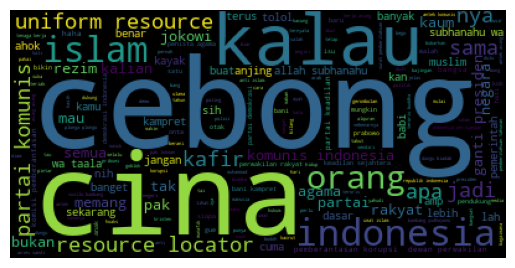

In [16]:
# Visualization Data >> Kata-kata yang muncul berdasarkan Kategori Hate Speech
hs_moderate = df.loc[df['HS_Moderate'] == 1]
teks = ' '.join(hs_moderate['Data_New_Tweet'])

wordcloud = WordCloud().generate(teks)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

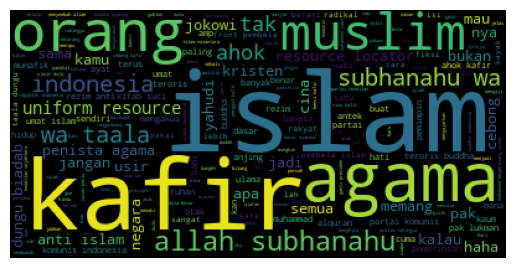

In [17]:
# Visualization Data >> Kata-kata yang muncul berdasarkan Kategori Agama
hs_religion = df.loc[df['HS_Religion'] == 1]
text = ' '.join(hs_religion['Data_New_Tweet'])

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

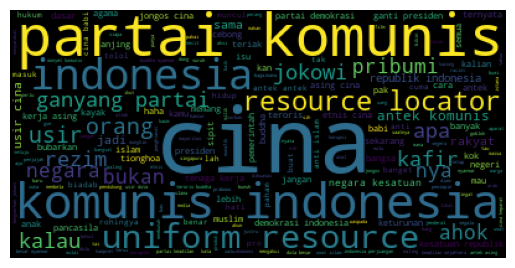

In [18]:
# Visualization Data >> Kata-kata yang muncul berdasarkan Kategori Ras
hs_race = df.loc[df['HS_Race'] == 1]
text = ' '.join(hs_race['Data_New_Tweet'])

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()